# Introduction
We are working with a dataset that contains information about Airbnb listings in the US. Our goal is to predict the price of a stay in these listings. The dataset consists of 74411 listings and 29 columns. One of the columns, log_price, is the target variable that we are trying to predict

# 6 ve 7 nci kısımlar yapıldıkça güncellenecek!

<font color = 'yellow'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
    
1. [ Outlier Detection](#10)

1. [Visualization](#11)
    * [Correlation Between Sibsp -- Parch -- Age -- Fare -- Survived](#12)
    * [SibSp -- Survived](#13)
    * [Parch -- Survived](#14)
    * [Pclass -- Survived](#15)
    * [Age -- Survived](#16)
    * [Pclass -- Survived -- Age](#17)
    * [Embarked -- Sex -- Pclass -- Survived](#18)
    * [Embarked -- Sex -- Fare -- Survived](#19)
    * [Fill Missing: Age Feature](#20)
1. [Feature Engineering](#21)
    * [Name -- Title](#22)
    * [Family Size](#23)
    * [Embarked](#24)
    * [Ticket](#25)
    * [Pclass](#26)
    * [Sex](#27)
    * [Drop Passenger ID and Cabin](#28)
1. [Modeling](#29)
    * [Train - Test Split](#30)
    * [Simple Logistic Regression](#31)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#32) 
    * [Ensemble Modeling](#33)
    * [Prediction and Submission](#34)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:\Users\qwert\AppData\Local\Temp\ipykernel_2972\749813131.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


1. <a id = "1"></a><br>
# Load and Check Data

In [3]:
cwd = os.getcwd()  # your current working directory (cwd)
files = os.listdir(cwd)  # This will Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\qwert\\OneDrive\\Masaüstü\\DATA SCIENCE\\PROJECTS\\PROJECT- FINAL\\ML_Project_Group_B': ['.git', 'Column_description.xlsx', 'Feature_Engineering.ipynb', 'Main.ipynb', 'Missing_Values.ipynb', 'modelling.ipynb', 'Outliers.ipynb', 'README.md', 'train.csv', 'Visualization.ipynb', 'zipcode_LA_DC_NY.csv', 'zipcode_usa.csv']


In [4]:
df = pd.read_csv('train.csv')

2. <a id = "2"></a><br>
# Variable Description


1. Id: It can be considered as a transaction registration number.

2. log_price: Price per night for rental. (TARGET)

3. property_type: Type of property to be rented.('Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel''Castle' 'Cabin' 'Treehouse'...)

4. room_type: The type of room to be rented. ('Entire home/apt' 'Private room' 'Shared room')

5. amenities: The essential items a guest expects to have a comfortable stay.("Wireless Internet","Air conditioning",Kitchen,"Free parking on premises","Smoke detector","Carbon monoxide detector","First aid kit","Safety card"...)

6. accommodates: Number of guests the rental can host. 

7. bathrooms:The number of bathroom found in the accommodation

8. bed_type: The type of bed found in the accommodation.(Real Bed, Futon, Pull-out Sofa, Couch, Airbed) 

9. cancellation_policy: Determines the amount of refund a guest will receive if they cancel their reservation. (strict, moderate, flexible, super_strict_30, super_strict_60)

10. cleaning_fee: Fee for cleaning the area you are staying in. (True, False)

11. city: Cities where the facility is located.(NYC, SF, DC, LA, Chicago, Boston)  

12. description: Detailed description of the space, usually including the room's features, amenities, location, and any special considerations or rules guests should be aware of.

13. first_review: Date of first feedback a guest leaves after staying at a particular property.

14. host_has_profile_pic: Whether the host has a profile picture (True, False)

15. host_identity_verified: Whether the host's identity has been confirmed. (True, False)

16. host_response_rate: Percentage of replies to host messages within a given time frame.

17. host_since: The date a host joined Airbnb and started using their property on the platform.

18. instant_bookable: Allows guests to book listings without having to wait for host's approval. (True, False)

19. last_review: The date when a guest last left feedback about their stay at that property.

20. latitude: Latitude value of the location of the facility.

21. longitude: Longtitude value of the location of the facility.

22. name: A descriptive or catchy headline that hosts use to attract guests.

23. neighbourhood: The specific district or district in which a property is located.

24. number_of_reviews: Represents the total number of reviews posted by guests staying at the property.

25. review_scores_rating: Value that represents the overall rating or evaluation given by guests to a host or accommodation. 

26. thumbnail_url: A web link address that points to a thumbnail image of a record.

27. zipcode: Zip code of the place where the accommodation is located

28. bedrooms: The number of separate bedrooms available to guests.

29. beds: The number of beds included in the rental

* [Categorical Variable](#4)
        

In [5]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns


['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode']


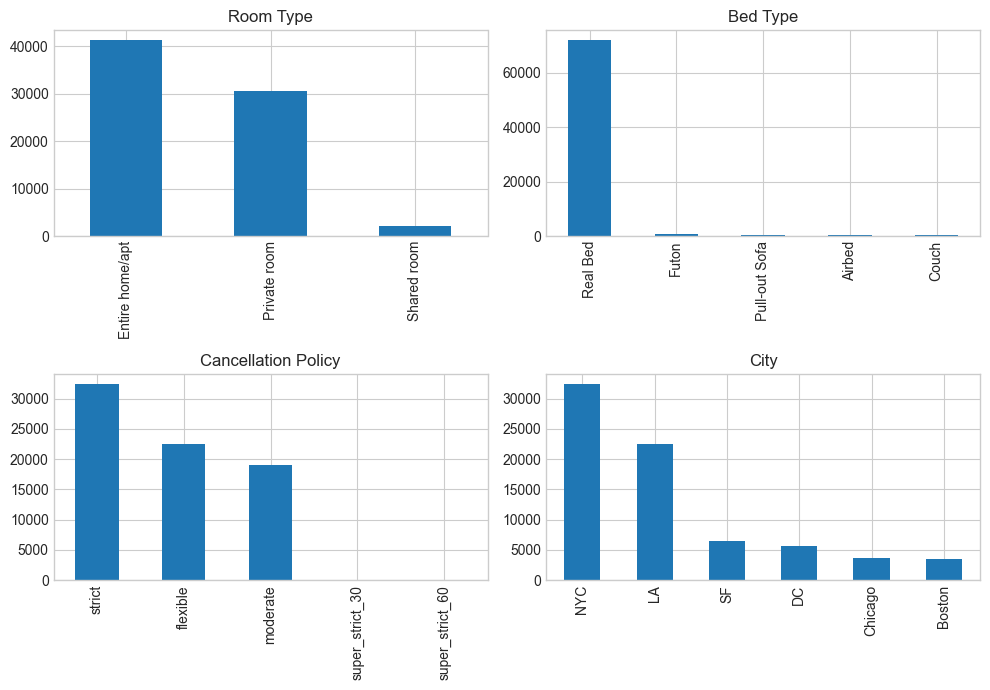

In [5]:
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
df['room_type'].value_counts().plot(kind='bar', title='Room Type')
plt.xlabel('')

plt.subplot(2, 2, 2)
df['bed_type'].value_counts().plot(kind='bar', title='Bed Type')
plt.xlabel('')

plt.subplot(2, 2, 3)
df['cancellation_policy'].value_counts().plot(kind='bar', title='Cancellation Policy')
plt.xlabel('')

plt.subplot(2, 2, 4)
df['city'].value_counts().plot(kind='bar', title='City')
plt.xlabel('')

plt.tight_layout()
plt.show()

* [Numerical Variable](#5)

In [7]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

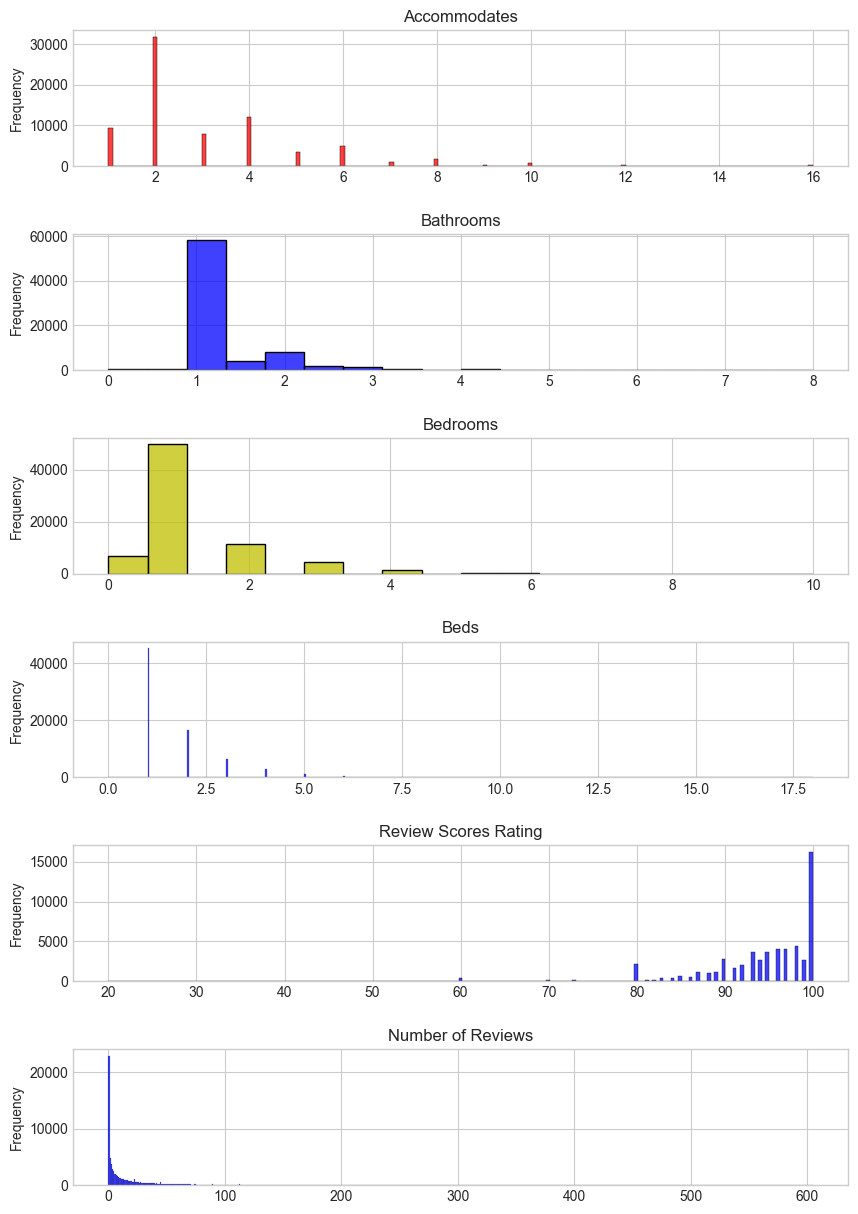

In [6]:
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)

columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
colors = ['r', 'b', 'y', 'b', 'b', 'b']
titles = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Review Scores Rating', 'Number of Reviews']

for i in range(len(columns)):
    sns.histplot(df[columns[i]], color=colors[i], ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency')

plt.show()

3. <a id = "3"></a><br>
# Basic Data Analysis


In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
#pd.set_option('display.max_columns', len(df.columns)) # To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [6]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [7]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [8]:
# Check Unique, Missing and Duplicated values

summary = pd.DataFrame(index=df.columns)
summary["Unique"] = df.nunique().values
summary["Duplicated"] = df.duplicated().sum()
summary["Missing"] = df.isnull().sum()
summary["Missing Percentage"] = (df.isnull().sum() / len(df)) * 100
summary["Types"] = df.dtypes
summary_styled = summary.style.background_gradient()
    
summary_styled

,Unique,Duplicated,Missing,Missing Percentage,Types
id,74111,0,0,0.000000,int64
log_price,767,0,0,0.000000,float64
property_type,35,0,0,0.000000,object
room_type,3,0,0,0.000000,object
amenities,67122,0,0,0.000000,object
accommodates,16,0,0,0.000000,int64
bathrooms,17,0,200,0.269865,float64
bed_type,5,0,0,0.000000,object
cancellation_policy,5,0,0,0.000000,object
cleaning_fee,2,0,0,0.000000,bool


* DATA CLEANING 

In [ ]:
df['amenities']=df['amenities'].replace(r'["]', '', regex=True)
df['name'] = df['name'].apply(lambda x: re.sub(r"[\*\-]|(\s*#\d+)", "", x))

4. <a id = "4"></a><br>
# Missing Value

<AxesSubplot:>

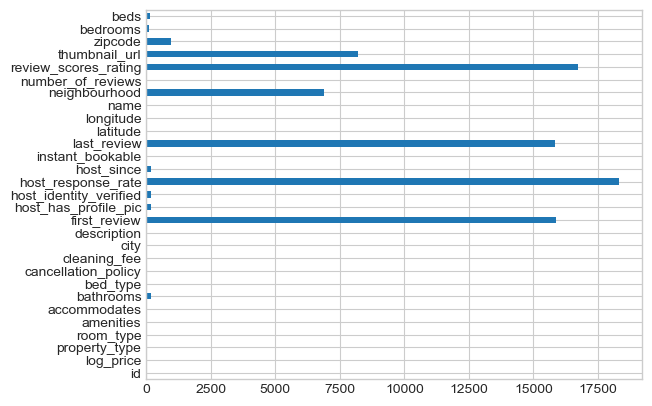

In [23]:

df.isnull().sum().plot.barh()

* property_type

In [22]:
df['property_type'].unique()

array(['Apartment', 'House', 'Condominium', 'Loft', 'Townhouse', 'Hostel',
       'Guest suite', 'Bed & Breakfast', 'Bungalow', 'Guesthouse', 'Dorm',
       'Other', 'Camper/RV', 'Villa', 'Boutique hotel', 'Timeshare',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'],
      dtype=object)

In [26]:
df['property_type'].value_counts()

property_type
Apartment             49003
House                 16511
Condominium           2658 
Townhouse             1692 
Loft                  1244 
Other                 607  
Guesthouse            498  
Bed & Breakfast       462  
Bungalow              366  
Villa                 179  
Dorm                  142  
Guest suite           123  
Camper/RV             94   
Timeshare             77   
Cabin                 72   
In-law                71   
Hostel                70   
Boutique hotel        69   
Boat                  65   
Serviced apartment    21   
Tent                  18   
Castle                13   
Vacation home         11   
Yurt                  9    
Hut                   8    
Treehouse             7    
Chalet                6    
Earth House           4    
Tipi                  3    
Train                 2    
Cave                  2    
Casa particular       1    
Parking Space         1    
Lighthouse            1    
Island                1    
Name: 

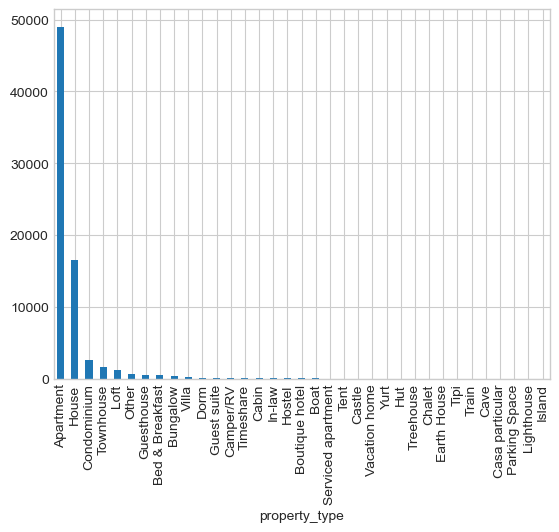

In [42]:
df['property_type'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [30]:
df['property_type'].isnull().sum()

0

* accommodates

In [34]:
df['accommodates'].unique()

array([ 3,  7,  5,  4,  2,  6,  8,  1,  9, 10, 16, 11, 12, 14, 13, 15],
      dtype=int64)

In [35]:
df['accommodates'].value_counts()

accommodates
2     31854
4     12066
1     9434 
3     7794 
6     4969 
5     3444 
8     1795 
7     946  
10    701  
16    301  
9     270  
12    264  
14    104  
11    79   
15    54   
13    36   
Name: count, dtype: int64

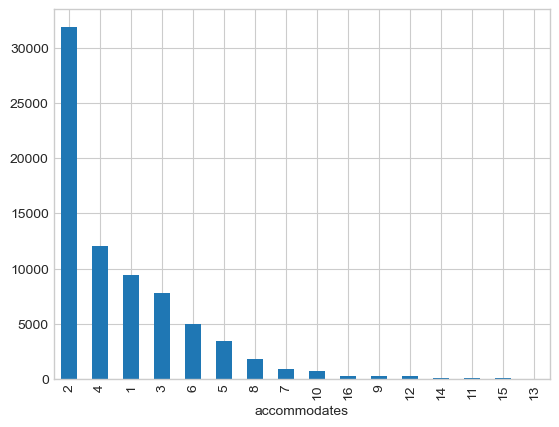

In [40]:
df['accommodates'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [36]:
df['accommodates'].isnull().sum()

0

  * bed_type

In [37]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Couch', 'Airbed'],
      dtype=object)

In [38]:
df['bed_type'].value_counts()

bed_type
Real Bed         72028
Futon            753  
Pull-out Sofa    585  
Airbed           477  
Couch            268  
Name: count, dtype: int64

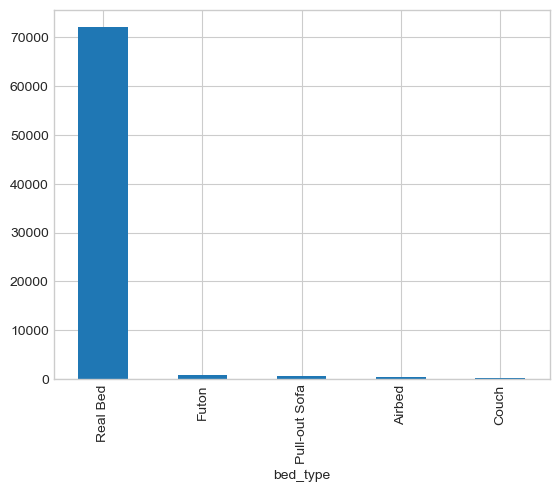

In [13]:
df['bed_type'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [39]:
df['bed_type'].isnull().sum()

0

* instant_bookable

In [43]:
df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

In [44]:
df['instant_bookable'].value_counts()

instant_bookable
f    54660
t    19451
Name: count, dtype: int64

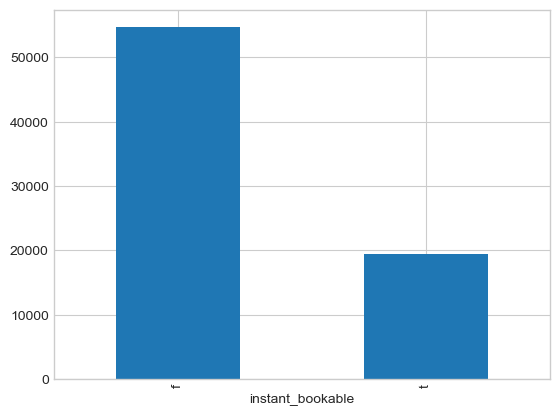

In [45]:
df['instant_bookable'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [46]:
df['instant_bookable'].isnull().sum()

0

* longitude

In [51]:
df['longitude'].unique()

array([ -73.99161685,  -73.98903992,  -73.94375584, ...,  -73.94237732,
        -74.00015737, -118.19240918])

In [52]:
df['longitude'].value_counts()

longitude
-73.991617     1
-73.953315     1
-73.932585     1
-76.976165     1
-118.451806    1
              ..
-73.960735     1
-73.980426     1
-87.619302     1
-87.681281     1
-118.192409    1
Name: count, Length: 74111, dtype: int64

In [53]:
df['longitude'].isnull().sum()

0

* number_of_reviews

In [54]:
df['number_of_reviews'].unique()

array([  2,   6,  10,   0,   4,   3,  15,   9, 159,  82,  29,  13,  12,
        26,   5,  57,  73,  14,   1,  40, 248,  46,  17, 138,  11,  44,
        34,  85,  18,  31,  30,  19,  25,  22,  23,  28,   7,  32, 144,
        16,  38, 105,  59,  67,  21, 120,   8,  61,  87, 206,  43, 104,
        47,  63, 186,  36,  27, 167,  48, 102,  51, 126,  81,  58,  72,
        68, 107,  79,  98,  39, 187, 123,  70,  78,  55,  54,  52,  42,
        75, 128,  60,  90, 254, 135,  64,  99, 191,  24,  66, 139, 125,
       129,  74, 318,  33,  35,  37,  20,  93,  83,  45,  41,  49, 289,
       190,  62,  88, 127, 154, 118, 216, 136,  69, 314, 112,  77,  56,
       181,  53, 117, 101, 106, 255, 114, 110, 192,  76, 113,  91, 182,
        84, 146, 119,  86,  50,  71, 157,  95,  94, 158, 142,  97, 194,
       173, 122, 132, 171, 111, 161, 208, 131, 384, 133, 116, 134, 148,
        89, 156, 179, 150, 147, 145, 202, 258, 178, 200, 155, 163, 149,
       267, 100,  65, 207, 242, 172, 121, 180,  80,  92, 263, 19

In [55]:
df['number_of_reviews'].value_counts()

number_of_reviews
0      15819
1      7106 
2      4750 
3      3661 
4      2912 
       ...  
370    1    
254    1    
449    1    
314    1    
341    1    
Name: count, Length: 371, dtype: int64

!!!  0 olma durumu incelenmeli,belki yeni bir ev olabilir

In [57]:
df['number_of_reviews'].isnull().sum()

0

* bedrooms

In [58]:
df['bedrooms'].unique()

array([ 1.,  3.,  2.,  0.,  4., nan,  5.,  6.,  7.,  8.,  9., 10.])

In [59]:
df['bedrooms'].value_counts()

bedrooms
1.0     49784
2.0     11351
0.0     6715 
3.0     4309 
4.0     1330 
5.0     355  
6.0     106  
7.0     38   
8.0     14   
10.0    10   
9.0     8    
Name: count, dtype: int64

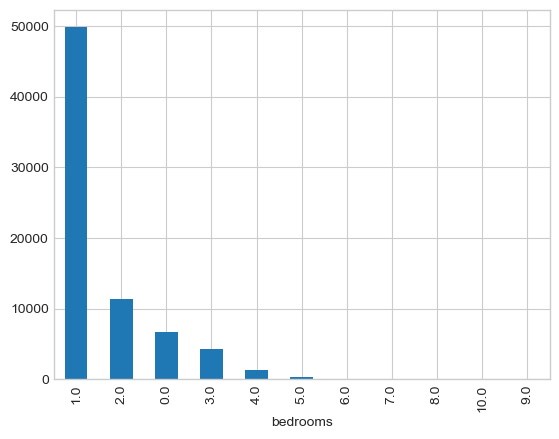

In [60]:
df['bedrooms'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [66]:
df['bedrooms'].isnull().sum()

91

            ###bedrooms none değerlerinin karşılığını tüm sütunlarla bilrlikte gösteriyor

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nan_rows = df[df['bedrooms'].isna()]
print(nan_rows)

In [65]:
count = len(df[df['bedrooms'] == 0])
print("bedrooms sütununda değeri 0 olan satır sayısı:", count)

bedrooms sütununda değeri nan olan satır sayısı: 6715


* thumbnail_url

In [71]:
df['thumbnail_url'].unique()

array(['https://a0.muscache.com/im/pictures/6d7cbbf7-c034-459c-bc82-6522c957627c.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/348a55fe-4b65-452a-b48a-bfecb3b58a66.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small',
       ...,
       'https://a0.muscache.com/im/pictures/7fbe448c-5293-4a22-a83e-54c8bc1bbf0d.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/b3971b63-06d9-4417-86ca-e6b40c22edca.jpg?aki_policy=small',
       'https://a0.muscache.com/im/pictures/22968537/da0156bc_original.jpg?aki_policy=small'],
      dtype=object)

In [72]:
df['thumbnail_url'].value_counts()

thumbnail_url
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              3
https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/95059281/d8bfc436_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/4491e5c5-33f6-4704-9887-76a059f86fda.jpg?aki_policy=small    2
                                                                                                ..
https://a0.muscache.com/im/pictures/111150220/7099e1de_original.jpg?aki_policy=small             1
https://a0.muscache.com/im/pictures/bfc6695c-93f9-4a90-a6d8-9f6c038fff28.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/99319739/70c4beaf_original.jpg?aki_policy=small              1
https://a0.muscache.com/im/pictures/3897544/bed318ce_original.jpg?aki_policy=small             

ayni resmi kullaan evler var!

otel veya bir ev içinde birden fazla paylaşılan oda olması durumundan dolayı aynı resmin kullanılma ihtimali var. Bundan dolayı önce property_type ile  karşılaştırma yapılmalı. (Nüseybe)

In [73]:
df['thumbnail_url'].isnull().sum()

8216

In [ ]:
   # making new feature "is_thumbnail_exist"
df['is_thumbnail_exist']= df.thumbnail_url.fillna(0).apply(lambda x: False if x == 0 else True)
df.head()

* 'host_since', 'host_has_profile_pic', 'host_identity_verified'

In [ ]:
#Missing 188 values of 3 specified columns in the same row. We predicted that there is a threshold due to incorrectly opened or incomplete records.
df.dropna(subset=['host_since', 'host_has_profile_pic', 'host_identity_verified'], inplace=True)

* bathrooms
        

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nan_rows = df[df['bathrooms'].isna()]
print(nan_rows)

In [26]:
#Filter rows containing 'one bathroom' or 'no bathroom' in the 'description' column
filtered_data = df[(df['description'].str.contains('one bathroom', na=False)) & (df['bathrooms'].isna())]
print(filtered_data)

             id  log_price property_type     room_type   
9008   18586142   4.442651     Apartment  Private room  \
69923  15390808   5.010635     Apartment  Private room   

                                               amenities  accommodates   
9008   {"Wireless Internet",Kitchen,Heating,Hangers,"...             1  \
69923  {TV,"Cable TV",Kitchen,"Pets live on this prop...             1   

       bathrooms  bed_type cancellation_policy  cleaning_fee city   
9008         NaN  Real Bed              strict          True  NYC  \
69923        NaN  Real Bed            flexible         False   LA   

                                             description first_review   
9008   One private bedroom:  double, side table, lamp...   2013-07-22  \
69923  I have an extra sunny remodeled bedroom for re...          NaN   

      host_has_profile_pic host_identity_verified host_response_rate   
9008                     t                      t                97%  \
69923                    t    

In [28]:
filtered_bath = df[(df['description'].str.contains('bathroom', na=False)) & (df['bathrooms'].isna())]
print(filtered_bath)

             id  log_price    property_type        room_type   
38     12232154   4.744932        Apartment  Entire home/apt  \
2355   19639906   3.912023            House     Private room   
2842   12130093   4.382027        Apartment  Entire home/apt   
3150    4280150   4.605170            House     Private room   
5234    1641060   5.883322        Apartment  Entire home/apt   
5771   10594745   4.234107  Bed & Breakfast     Private room   
6353   16416743   3.871201            House     Private room   
6441   21119264   5.010635        Apartment  Entire home/apt   
8537    6249284   5.298317        Apartment     Private room   
9008   18586142   4.442651        Apartment     Private room   
10110   2318184   4.094345            House     Private room   
10954  17387395   4.007333        Apartment     Private room   
11727  13496609   4.248495            House     Private room   
12351  10943915   4.605170            House      Shared room   
12844   3116572   4.317488        Apartm

In [29]:
import re

# Search for texts in the Description column and find matching patterns
pattern = r'(\w+)\s+bathroom'
matches = filtered_bath['description'].str.extract(pattern, flags=re.IGNORECASE)

# Eşleşen desenleri yeni bir sütun olarak ekleyin
filtered_bath['pre_bathroom_word'] = matches

# Sonucu yazdırın
print(filtered_bath[['description','pre_bathroom_word']])

                                             description pre_bathroom_word
38     Available July 17 to July 30 Minimum 8 nights ...        attractive
2355   Private Room in Mid-City Los Angeles. Shared b...            Shared
2842   This is a very small  studio apartment with a ...               and
3150   Nice clean private room with bathroom and priv...              with
5234   Enter a modern world in harmony - where nature...          upgraded
5771   Full bed  SHARED bathroom  4th floor walk up B...            SHARED
6353   ABOUT THE ROOM: This is for a large private ro...            shared
6441   Our one bedroom is available right in the midd...             large
8537   Spacious room in an apartment overlooking the ...         dedicated
9008   One private bedroom:  double, side table, lamp...               one
10110  This cozy room is in a charming Spanish style ...                 a
10954  I have a single room that is very small and co...               the
11727  Private, large, fu

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2972\2717930529.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bath['pre_bathroom_word'] = matches


* first_review

In [20]:
# Filters empty values in column 'host_since'
filtered_data = df[df['host_since'].isnull()]
#last review filters out empty values from the filtered values
filtered_data =  filtered_data[filtered_data['last_review'].isnull()]
# Returns whether the values in the selected properties are empty after 2 filters
selected_columns = filtered_data[['first_review', 'host_has_profile_pic', 'host_identity_verified']]
print(selected_columns)

      first_review host_has_profile_pic host_identity_verified
92             NaN                  NaN                    NaN
525            NaN                  NaN                    NaN
6878           NaN                  NaN                    NaN
9996           NaN                  NaN                    NaN
15288          NaN                  NaN                    NaN
16075          NaN                  NaN                    NaN
16949          NaN                  NaN                    NaN
18815          NaN                  NaN                    NaN
19171          NaN                  NaN                    NaN
19629          NaN                  NaN                    NaN
20110          NaN                  NaN                    NaN
23109          NaN                  NaN                    NaN
23705          NaN                  NaN                    NaN
26325          NaN                  NaN                    NaN
35323          NaN                  NaN                

In [21]:
#As a result of filtering, we drop these rows because the same row is empty in 9 properties.
df = df.drop(filtered_data.index)

In [22]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15828
host_has_profile_pic        152
host_identity_verified      152
host_response_rate        18263
host_since                  152
instant_bookable              0
last_review               15791
latitude                      0
longitude                     0
name                          0
neighbourhood              6871
number_of_reviews             0
review_scores_rating      16686
thumbnail_url              8212
zipcode                     987
bedrooms                     91
beds                        131
city-neigh                 6871
dtype: int64

* zipcode

In [8]:
df['zipcode'] = pd.to_numeric(df['zipcode'],errors='coerce')

In [9]:
correlation = df['log_price'].corr(df['zipcode'])
print("Correlation:", correlation)

Correlation: 0.03402257978807774


In [23]:
#pip install uszipcode    # installing Library to find zip code from latitude and longitude information using us zip code
from uszipcode import SearchEngine

search = SearchEngine()
zipcodes = []
for index, row in df.iterrows():
    latitude = row['latitude']  # Latitude 
    longitude = row['longitude']  # Longitude 

    result = search.by_coordinates(latitude, longitude)
    if result:
        zipcode = result[0].zipcode
        zipcodes.append(zipcode)
    else:
        zipcodes.append(None)  # None if postal code not found or incorrect

df['Zipcode'] = zipcodes  # Adds a new Zipcode column

In [25]:
df[['Zipcode','zipcode']].head(40)   #comparing two columns for first observation

,Zipcode,zipcode
0,11201,11201.0
1,10019,10019.0
2,10037,10027.0
3,94115,94117.0
4,20010,20009.0
5,94114,94131.0
6,90292,90292.0
7,90017,90015.0
8,94121,94121.0
9,91748,91748.0


* Neighbourhood

In [ ]:
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
# taking zipcodes
zipcodes = df['Zipcode']
#print(zipcodes)

In [ ]:


# Nominatim geocoder'ı başlatın
geolocator = Nominatim(user_agent='my_app')

# Zip kodlarına göre mahalleleri alın
neighbourhoods = []
for zipcode in zipcodes:
    try:
        location = geolocator.geocode(zipcode)
        neighbourhood = location.raw['address'].get('neighbourhood', 'Unknown')
        neighbourhoods.append(neighbourhood)
    except Exception as e:
        print(f"Hata: {e} - Zip kodu: {zipcode}")

# "neighbourhood" sütununu oluşturun
df['neighbourhoods'] = neighbourhoods

# Sonucu yazdırın
print(df[['neighbourhoods', 'neighbourhood']])

In [ ]:
# SearchEngine'i başlatın
search = SearchEngine

# Zip kodlarına göre mahalleleri alın
neighbourhoods = []
for zipcode in zipcodes:
    try:
        result = search.by_zipcode(zipcode)
        neighbourhood = result.major_city if result.major_city else "Unknown"
        neighbourhoods.append(neighbourhood)
    except Exception as e:
        print(f"Hata: {e} - Zip kodu: {zipcode}")

In [ ]:
df['neighbourhoods'] = neighbourhoods

In [ ]:

print(df[['neighbourhood', 'neighbourhoods']])


In [18]:
# yakın olan yerlerin hangi şehirde olduğunu bulmak için yeni bir sütun oluşturdum. neıghbourhood yerine kullanılabilir.

df['city-neigh'] = df['city'] + '-' + df['neighbourhood']
df['city-neigh'].value_counts()

city-neigh
NYC-Williamsburg                          2862
NYC-Bedford-Stuyvesant                    2166
NYC-Bushwick                              1601
NYC-Upper West Side                       1396
LA-Mid-Wilshire                           1392
NYC-Harlem                                1374
LA-Hollywood                              1321
NYC-Hell's Kitchen                        1299
LA-Venice                                 1222
NYC-Upper East Side                       1206
NYC-Crown Heights                         1076
NYC-Astoria                                898
NYC-Lower East Side                        833
NYC-East Village                           814
NYC-East Harlem                            793
SF-Mission District                        784
LA-West Hollywood                          729
NYC-Chelsea                                726
NYC-Greenpoint                             725
NYC-Washington Heights                     721
NYC-Hamilton Heights                       628
NY

* host_response_rate

In [ ]:
#grafiği sor
df.host_response_rate = df.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df.host_response_rate = df.host_response_rate.fillna(df.host_response_rate.mean())

* last_review

In [ ]:
#first ewview ile kontrol
nan_rows = df[df['first_review'].isnull()]
nan_last_review_count = np.sum(nan_rows['last_review'].isnull())
nan_last_review_count
# We detected that the values that are Nan in the last review are Nan in the first review values.

In [ ]:
df.last_review.fillna(method="ffill",inplace=True)

* review_scores_rating

In [ ]:
# The "number_of_reviews" column values are directly related to the values in the "review_scores_rating" column
filtered_data = df[["number_of_reviews","review_scores_rating"]][df.number_of_reviews == 0]
filtered_data

In [ ]:
# We compared the Nan-valued rows of the "review_scores_rating" column with the 0 values of the "number_of_reviews" column. 
# If the value is 0, we set the Nan value to 0.
zero_reviews_nan_scores = df[(df['number_of_reviews'] == 0) & (df['review_scores_rating'].isnull())]
df.loc[zero_reviews_nan_scores.index, 'review_scores_rating'] = 0

In [ ]:
#filled the remaining missing values with the mean
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)

* beds

In [ ]:
#The number of beds is directly related to the bedroom and bed_type column.
result = df.loc[df['beds'].isnull(), 'bed_type'].value_counts() # boş olan beds değerlerinin, bed_type değerleri
result

In [ ]:
## boş olan beds değerlerinin, bedrooms değerleri
result = df.loc[df['beds'].isnull(), 'bedrooms'].value_counts()
result 

In [ ]:
# We filled the empty beds with 1, those whose bedroms value is empty and 1, and those whose bed_type value is Real Bed. 
# We completed the remaining empty values with the value of bedrooms.
df.loc[((df['beds'].isnull()) | (df['beds'] == 0)) & (df['bedrooms'] == 1) & (df['bed_type'] == 'Real Bed'), 'beds'] = 1
df.loc[df['beds'].isnull(), 'beds'] = df['bedrooms']

4. <a id = "4"></a><br>
# Outlier Detection

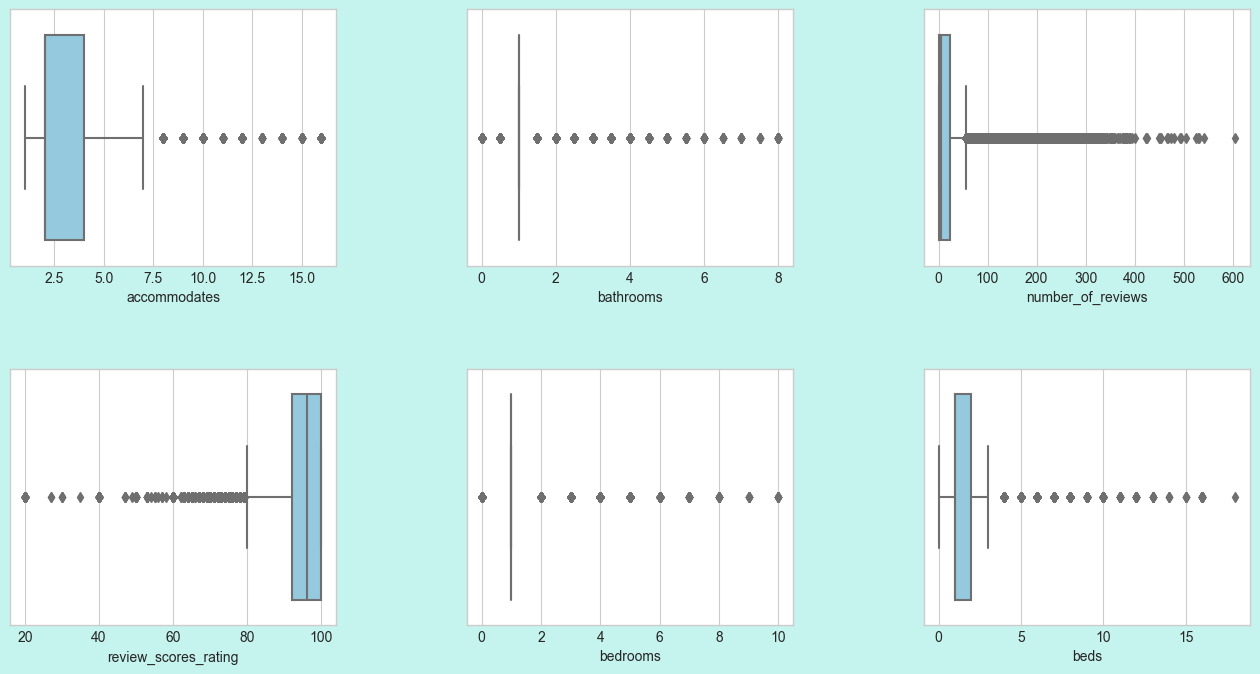

In [4]:
numerical_columns = ['accommodates', 'bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
fig = plt.figure(facecolor='#C5F3ED', figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for num, column_name in enumerate(numerical_columns):
    ax = fig.add_subplot(2, 3, num +1)
    ax = sns.boxplot(x=df[column_name], color='skyblue')